### Analysis of the Literature Research Process

This notebook contains details about the literature survey

In [1]:
# First we are going to load the JSON file containing the literature research
import os
import json

current_dir = os.getcwd()
data_dir = os.path.join("./extraction.json")
process_dir = os.path.join("../literature_survey/research_process.json")
references_dir = os.path.join("../literature_survey/research_process.json")

with open(os.path.join(current_dir, data_dir), "r", encoding="utf-8") as f:
    papers_data = json.load(f)

with open(os.path.join(current_dir, process_dir), "r", encoding="utf-8") as f:
    process_data = json.load(f)
    
with open(os.path.join(current_dir, references_dir), "r", encoding="utf-8") as f:
    research_process = json.load(f)

### Number of Question Types by Paper Category and Domain

In [2]:
from collections import defaultdict
import pandas as pd
# Using defaultdict allows us to avoid checking if a key exists in the dictionary
# it automatically initializes the key with the default value (in this case, 0)
# when a new key is encountered
question_type_counts = defaultdict(int)
paper_counts = defaultdict(int)

for paper in papers_data:
    paper_cat = paper.get("category", "Unknown")
    num_types = len(paper.get("types", []))
    question_type_counts[paper_cat] += num_types
    paper_counts[paper_cat] += 1
data = [
    {
        "Category": cat,
        "Number of Question Types": question_type_counts[cat],
        "Number of Papers": paper_counts[cat]
    }
    for cat in question_type_counts
]
analysis_overall_df = pd.DataFrame(data)

total_question_types = analysis_overall_df["Number of Question Types"].sum()
total_papers = analysis_overall_df["Number of Papers"].sum()

total_row = pd.DataFrame([{
    "Category": "Total",
    "Number of Question Types": total_question_types,
    "Number of Papers": total_papers
}])
analysis_overall_df = pd.concat([analysis_overall_df, total_row], ignore_index=True)

# Sort the DataFrame by Category
analysis_overall_df.sort_values(by=["Category"], inplace=True)
analysis_overall_df.reset_index(drop=True, inplace=True)

print("Analysis: Total number of question types by paper category")
display(analysis_overall_df)

Analysis: Total number of question types by paper category


,Category,Number of Question Types,Number of Papers
0,Knowledge Graph Question Answering Dataset,77,10
1,Other,12,2
2,Question Classifier,92,9
3,Research Questions,46,6
4,Total,227,27


In [3]:
from collections import defaultdict
import pandas as pd
# Using defaultdict allows us to avoid checking if a key exists in the dictionary
# it automatically initializes the key with the default value (in this case, 0)
# when a new key is encountered
analysis_overall_counts = defaultdict(int)
paper_overall_counts = defaultdict(int)

for paper in papers_data:
    paper_cat = paper.get("category", "Unknown")
    paper_dom = paper.get("domain", "Unknown")
    num_types = len(paper.get("types", []))
    analysis_overall_counts[(paper_cat, paper_dom)] += num_types
    paper_overall_counts[(paper_cat, paper_dom)] += 1

data = [
    {
        "Category": cat,
        "Domain": dom,
        "Number of Question Types": analysis_overall_counts[(cat, dom)],
        "Number of Papers": paper_overall_counts[(cat, dom)]
    }
    for (cat, dom) in analysis_overall_counts
]
analysis_overall_df = pd.DataFrame(data)

# Calculate totals
total_question_types = analysis_overall_df["Number of Question Types"].sum()
total_papers = analysis_overall_df["Number of Papers"].sum()
total_row = pd.DataFrame([{
    "Category": "Total",
    "Domain": "",
    "Number of Question Types": total_question_types,
    "Number of Papers": total_papers
}])

analysis_overall_df = pd.concat([analysis_overall_df, total_row], ignore_index=True)

# Sort the DataFrame by Category and then by Domain
analysis_overall_df.sort_values(by=["Category", "Domain"], inplace=True)
analysis_overall_df.reset_index(drop=True, inplace=True)

print("Analysis: Total number of question types and papers by paper category and domain")
display(analysis_overall_df)

Analysis: Total number of question types and papers by paper category and domain


,Category,Domain,Number of Question Types,Number of Papers
0,Knowledge Graph Question Answering Dataset,Covid,9,1
1,Knowledge Graph Question Answering Dataset,General,27,4
2,Knowledge Graph Question Answering Dataset,Requirements Engineering,3,1
3,Knowledge Graph Question Answering Dataset,Scholarly,38,4
4,Other,General,8,1
5,Other,Software Engineering,4,1
6,Question Classifier,General,58,6
7,Question Classifier,Social Science,4,1
8,Question Classifier,Spoken Natural Language Processing,8,1
9,Question Classifier,Vietnamese Language,22,1


### Publication Year Distribution

In [4]:
year_counts = defaultdict(int)

for paper in papers_data:
    year = paper.get("year", "Unknown")
    year_counts[year] += 1

data = [
    {"Year": year, "Number of Papers": count}
    for year, count in year_counts.items()
]
analysis_overall_df = pd.DataFrame(data)

analysis_overall_df.sort_values(by=["Year"], inplace=True, ascending=False)
analysis_overall_df.reset_index(drop=True, inplace=True)

print("Analysis: Number of papers published by year")
display(analysis_overall_df)

Analysis: Number of papers published by year


,Year,Number of Papers
0,2024,1
1,2023,4
2,2022,2
3,2021,1
4,2020,2
5,2019,3
6,2017,1
7,2016,1
8,2015,3
9,2009,1


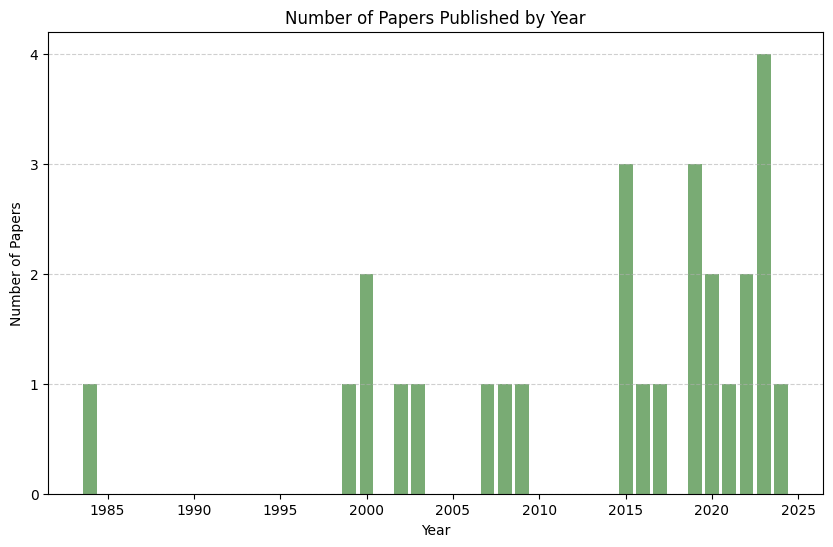

In [5]:
# Display as a bar chart and save as PDF
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(analysis_overall_df["Year"], 
    analysis_overall_df["Number of Papers"], 
    color="#79ab74")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers Published by Year")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.yticks(range(0, max(analysis_overall_df["Number of Papers"]) + 1))

plt.savefig("papers_by_year.pdf", bbox_inches='tight')

plt.show()
plt.close()

### Distribution of References
In the following output, the distribution of references is shown. This data reveals the extent to which the classifications may have been informed by prior work.

For this analysis, the "references" fields are used to gather which paper references another paper that is in the final list.

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)


# First we get the metadata
reference_mapping = {}

for iteration in research_process:
    for paper_process in iteration.get("processing", []):
        title = paper_process.get("title", "No title").lower()        
        if not paper_process.get("added_to_final", False):
            continue
        if reference_mapping.get(title) is None:
                reference_mapping[title] = []
        for reference in paper_process.get("references", []):
            reference_mapping[title].append(reference.lower())

# Now we process each reference_mapping and only keep those references that also have a dict key entry
for title, references in reference_mapping.items():
    delete_idx = []
    for idx, reference in enumerate(references):
        if reference.lower() in reference_mapping.keys():
            continue
        delete_idx.append(idx)
    for idx in reversed(delete_idx):
        del references[idx]


print(f"Total length of references: {len(reference_mapping)}")

rows = []
for idx, (title, references) in enumerate(reference_mapping.items()):
    rows.append({"title": title, "references": references, "amount": len(references)})

df_references = pd.DataFrame(rows)
# sort by amount of references
df_references = df_references.sort_values(by=["amount"], ascending=False)
df_references


Total length of references: 27


,title,references,amount
0,the sciqa scientific question answering benchmark for scholarly knowledge,"[large-scale simple question answering with memory networks, lc-quad 2.0: a large dataset for complex question answering over wikidata and dbpedia, learning question classifiers, at&t at trec-8, a rule-based question answering system for reading comprehension tests, learning foci for question answering over topic maps]",6
15,linguistically motivated question classification,"[at&t at trec-8, learning question classifiers, the structure and performance of an open-domain question answering system, learning foci for question answering over topic maps]",4
25,hybrid-squad: hybrid scholarly question answering dataset,"[the sciqa scientific question answering benchmark for scholarly knowledge, dblp-quad: a question answering dataset over the dblp scholarly knowledge graph, question answering on scholarly knowledge graphs]",3
3,divide and conquer the empire: a community-maintainable knowledge graph of empirical research in requirements engineering,"[the future of empirical methods in software engineering research, the sciqa scientific question answering benchmark for scholarly knowledge, question answering on scholarly knowledge graphs]",3
7,a non-factoid question-answering taxonomy,[learning question classifiers],1
10,the question answering systems: a survey,[learning question classifiers],1
19,dblp-quad: a question answering dataset over the dblp scholarly knowledge graph,[lc-quad 2.0: a large dataset for complex question answering over wikidata and dbpedia],1
17,qald-10 – the 10th challenge on question answering over linked data,[lc-quad 2.0: a large dataset for complex question answering over wikidata and dbpedia],1
24,ripple down rules for question answering,[],0
23,a comparative study of question answering over knowledge bases,[],0


### Distribution of Citations
In the following output, the distribution of citations is shown. This provides insight into the relative influence of each publication within this dataset.

For this analysis, the "references" fields are used to gather which paper references another paper that is in the final list. The output is then inverted to show the number of citations per paper.

In [9]:
# First we get the metadata
citation_mapping = {}
for idx, (title, references) in enumerate(reference_mapping.items()):
    for reference in references:
        if citation_mapping.get(reference) is None:
            citation_mapping[reference] = []
        citation_mapping[reference].append(title)
        
rows = []
for idx, (title, references) in enumerate(citation_mapping.items()):
    rows.append({"title": title, "citations": references, "amount": len(references)})

df_citations = pd.DataFrame(rows)
# sort by amount of citations
df_citations = df_citations.sort_values(by=["amount"], ascending=False)
df_citations

,title,citations,amount
2,learning question classifiers,"[the sciqa scientific question answering benchmark for scholarly knowledge, a non-factoid question-answering taxonomy, the question answering systems: a survey, linguistically motivated question classification]",4
1,lc-quad 2.0: a large dataset for complex question answering over wikidata and dbpedia,"[the sciqa scientific question answering benchmark for scholarly knowledge, qald-10 – the 10th challenge on question answering over linked data, dblp-quad: a question answering dataset over the dblp scholarly knowledge graph]",3
3,at&t at trec-8,"[the sciqa scientific question answering benchmark for scholarly knowledge, linguistically motivated question classification]",2
5,learning foci for question answering over topic maps,"[the sciqa scientific question answering benchmark for scholarly knowledge, linguistically motivated question classification]",2
7,the sciqa scientific question answering benchmark for scholarly knowledge,"[divide and conquer the empire: a community-maintainable knowledge graph of empirical research in requirements engineering, hybrid-squad: hybrid scholarly question answering dataset]",2
8,question answering on scholarly knowledge graphs,"[divide and conquer the empire: a community-maintainable knowledge graph of empirical research in requirements engineering, hybrid-squad: hybrid scholarly question answering dataset]",2
0,large-scale simple question answering with memory networks,[the sciqa scientific question answering benchmark for scholarly knowledge],1
4,a rule-based question answering system for reading comprehension tests,[the sciqa scientific question answering benchmark for scholarly knowledge],1
6,the future of empirical methods in software engineering research,[divide and conquer the empire: a community-maintainable knowledge graph of empirical research in requirements engineering],1
9,the structure and performance of an open-domain question answering system,[linguistically motivated question classification],1
